In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the csv file
data = pd.read_csv ("cropdata.csv")
print(data.head(1))


   temperature   humidity        ph    rainfall label
0    20.879744  82.002744  6.502985  202.935536  rice


In [3]:
data.describe()

,temperature,humidity,ph,rainfall
count,3100.000000,3100.000000,3100.000000,3100.000000
mean,27.108466,66.005312,6.368913,110.213031
std,7.566308,24.007713,0.809477,64.048562
min,8.825675,10.034048,3.504752,20.211267
25%,22.810495,55.244920,5.895343,64.909095
50%,26.102848,68.980529,6.342518,97.057093
75%,29.365644,84.446524,6.841616,141.210784
max,54.986760,99.981876,9.935091,397.315380


(array([  10.,  107.,  180.,  752., 1104.,  624.,  248.,   48.,   20.,
           7.]),
 array([3.50475231, 4.14778616, 4.79082   , 5.43385384, 6.07688768,
        6.71992152, 7.36295536, 8.00598921, 8.64902305, 9.29205689,
        9.93509073]),
 <BarContainer object of 10 artists>)

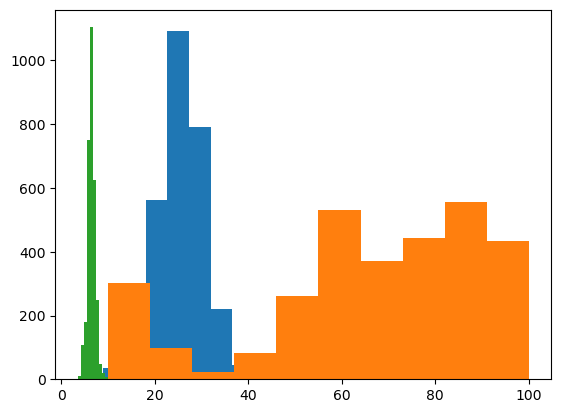

In [4]:
#histogram plots
#1
counts, bins = np.histogram(data.iloc[:,0])
plt.hist(bins[:-1], bins, weights=counts)
#2
counts, bins = np.histogram(data.iloc[:,1])
plt.hist(bins[:-1], bins, weights=counts)
#3
counts, bins = np.histogram(data.iloc[:,2])
plt.hist(bins[:-1], bins, weights=counts)

In [5]:
#Creating dummy variable for target i.e label
label= pd.get_dummies(data.label).iloc[: , 1:]
data= pd.concat([data,label],axis=1)
data.drop('label', axis=1,inplace=True)
print('The data present in one row of the dataset is')
print(data.head(1))
train=data.iloc[:, 0:4].values
test=data.iloc[: ,4:].values

The data present in one row of the dataset is
   temperature   humidity        ph    rainfall  Black gram  Chickpea  \
0    20.879744  82.002744  6.502985  202.935536           0         0   

   Coconut  Coffee  Cotton  Ground Nut  ...  maize  mango  millet  muskmelon  \
0        0       0       0           0  ...      0      0       0          0   

   orange  papaya  pomegranate  rice  watermelon  wheat  
0       0       0            0     1           0      0  

[1 rows x 34 columns]


In [6]:
#Dividing the data into training and test set
from sklearn.model_selection import PredefinedSplit, train_test_split
X_train,X_test,y_train,y_test=train_test_split(train,test,test_size=0.3)

In [7]:
len(X_train)

2170

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
#svm model

# importing necessary libraries 
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
  

In [10]:
#Reading the csv file
data=pd.read_csv('cropdata.csv')


In [11]:
# X -> features, y -> label 
X = data.iloc[:,0:4]
y = data.iloc[:,4]

In [12]:
 #dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
  

In [13]:
# training a linear SVM classifier 
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  

In [14]:
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
print(accuracy)
  

0.863225806451613


In [15]:
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 

print(accuracy)


0.863225806451613


In [16]:
#svm prediction trial
svm_model_linear.predict([[26.986037,89.413849,6.260839,58.548767]])


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['watermelon'], dtype=object)

In [17]:
#coverting svm model to pickle.
import pickle
pickle.dump(svm_model_linear,open('svm_model_linear.pkl','wb'))


In [18]:
#
from joblib import dump, load

loaded_svm = load(open("svm_model_linear.pkl", "rb"))
loaded_svm.predict([[20.986037,90.413849,8.260839,68.548767]])[0]



C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


'Cotton'

In [19]:
#inputs

# 20.879744  82.002744  6.502985  202.935536  orange
# 26.491096	80.158363	6.980401	242.864034 orange

In [ ]:
#temperature   humidity        ph    rainfall
temp = float(input('Enter temperature : '))
hum = float(input('Enter humidity : '))
ph = float(input('Enter pH : '))
rainfall = float(input('Enter rainfall : '))

crop = data_copy.columns[np.argmax(clf.predict([[temp,hum,ph,rainfall]])[0]) + 4]
print('Most beneficial Crop :', crop)